In [3]:
import numpy as np
import matplotlib.pyplot as plt
import _pickle as pkl
import pandas as pd
import os,sys,glob, h5py

from dlab import generalephys as ephys
from dlab.generalephys import placeAxesOnGrid, cleanAxes
from dlab import utils
from dlab import rf_analysis
from dlab import psth_and_raster as psth
from dlab import reliability_and_precision as rp
from dlab.continuous_traces import gaussian_filter1d
from scipy.signal import find_peaks
from scipy.stats import pearsonr, spearmanr, zscore
from itertools import combinations 

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

import seaborn as sns
sns.set_style('white')
%matplotlib inline
%load_ext autoreload
%autoreload 2
import warnings
warnings.filterwarnings('ignore')

In [4]:
from neuralynx_io import neuralynx_io as neuralynxio

In [5]:
import glob

# import files

In [7]:
# path to the LFP files on your computer - glob.glob function will create a list of all files that end in .ncs (should be all 16 LFP channel files)
datapath = glob.glob('/Users/kimberlygagnon/Desktop/CC6/2018-02-07_09-27-45/Recording_0001/*.ncs')
print(datapath)

['/Users/kimberlygagnon/Desktop/CC6/2018-02-07_09-27-45/Recording_0001/LFP9.ncs', '/Users/kimberlygagnon/Desktop/CC6/2018-02-07_09-27-45/Recording_0001/LFP8.ncs', '/Users/kimberlygagnon/Desktop/CC6/2018-02-07_09-27-45/Recording_0001/LFP16.ncs', '/Users/kimberlygagnon/Desktop/CC6/2018-02-07_09-27-45/Recording_0001/LFP1.ncs', '/Users/kimberlygagnon/Desktop/CC6/2018-02-07_09-27-45/Recording_0001/LFP15.ncs', '/Users/kimberlygagnon/Desktop/CC6/2018-02-07_09-27-45/Recording_0001/LFP3.ncs', '/Users/kimberlygagnon/Desktop/CC6/2018-02-07_09-27-45/Recording_0001/LFP2.ncs', '/Users/kimberlygagnon/Desktop/CC6/2018-02-07_09-27-45/Recording_0001/LFP14.ncs', '/Users/kimberlygagnon/Desktop/CC6/2018-02-07_09-27-45/Recording_0001/LFP10.ncs', '/Users/kimberlygagnon/Desktop/CC6/2018-02-07_09-27-45/Recording_0001/LFP6.ncs', '/Users/kimberlygagnon/Desktop/CC6/2018-02-07_09-27-45/Recording_0001/LFP7.ncs', '/Users/kimberlygagnon/Desktop/CC6/2018-02-07_09-27-45/Recording_0001/LFP11.ncs', '/Users/kimberlygagnon

# Extract LFPs from raw data files

In [ ]:
lfps = [] #initiate an array
for i in datapath: #for every file in your datapath:
    ncs = neuralynxio.load_ncs(i)  # Load signal data into a dictionary
    lfp = ncs['data'] # Access just lfps
    lfps.append(lfp) #append the lfp for the channel within the loop to the initiated array

In [9]:
#16 channels, by ___ timestamps (samples (32k Hz) in the recording)
shape(lfps)

(16, 38608384)

# create a dataframe of LFP information for further analysis

In [1]:
# create a 1 by 16 array to initiate a dataframe that will contain the LFP information
channels = arange(1,17,1)
print(channels)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]


In [10]:
df_lfp = pd.DataFrame(data = channels, columns = ['channels'])
df_lfp

,channels
0,1
1,2
2,3
3,4
4,5
5,6
6,7
7,8
8,9
9,10


# add your extracted LFPs to the initiated dataframe

In [11]:
# add a new column called lfps to the df_lfp dataframe, and append extracted lfps to that column
df_lfp['lfp'] = lfps

In [15]:
# show
df_lfp

,channels,lfp
0,1,"[98.57177734375, 99.4873046875, 100.4028320312..."
1,2,"[9999.69482421875, 9999.69482421875, 9999.6948..."
2,3,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,4,"[5130.0048828125, 5131.2255859375, 5132.751464..."
4,5,"[58.59375, 58.89892578125, 58.89892578125, 58...."
5,6,"[6262.8173828125, 6263.73291015625, 6264.64843..."
6,7,"[9999.69482421875, 9999.69482421875, 9999.6948..."
7,8,"[26.85546875, 26.2451171875, 25.93994140625, 2..."
8,9,"[-1831.35986328125, -1830.74951171875, -1829.8..."
9,10,"[9999.69482421875, 9999.69482421875, 9999.6948..."


In [ ]:
np.diff(df)

# plot the first second of LFP activity on the first channel

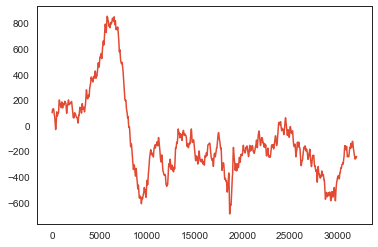

In [13]:
# df_lfp.lfp accesses the lfp column within dataframe,
# df_lfp.lfp[0] is the first index or row in the dataframe, which is the first channel
# df_lfp.lfp[0][32000] is the first second (first 32k samples) of activity on the first channel
plt.plot(df_lfp.lfp[0][0:32000]) 

# plot the first second of LFP activity on the eighth channel

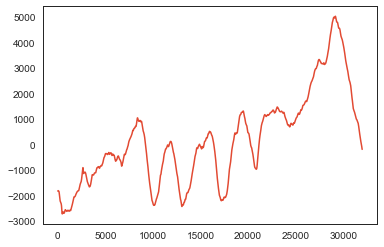

In [16]:
plt.plot(df_lfp.lfp[8][0:32000]) 

# plot the 2nd second of LFP activity on the eighth channel

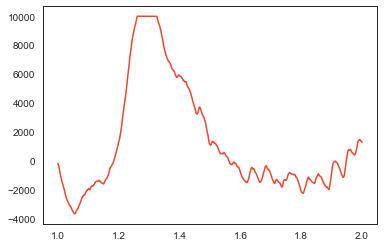

In [36]:
plt.plot(x,df_lfp.lfp[8][32000:64000]) 

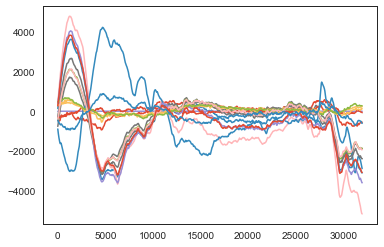

In [38]:
for i,lfp in enumerate(df_lfp.lfp):
    plt.plot(lfp[1920000:1952000])

In [22]:
diff = 1/32000

In [24]:
x = np.arange(1,2,diff) # create a new variable called x that is an array with time in seconds to plot on your x axis

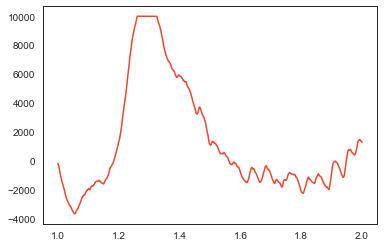

In [25]:
# plt.plot(x,y) with x as your new variable and y as your LFP activity
plt.plot(x,df_lfp.lfp[8][32000:64000]) 


In [51]:
%matplotlib osx

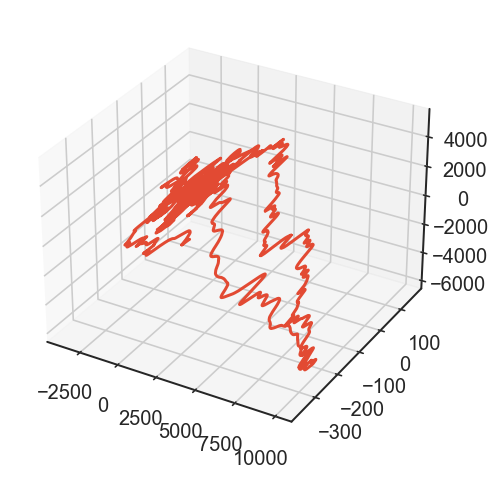

<Figure size 864x576 with 0 Axes>

In [53]:
ax = plt.axes(projection='3d')
fig = plt.figure()
ax.plot3D(df_lfp.lfp[8][32000:64000],df_lfp.lfp[7][32000:64000],df_lfp.lfp[6][32000:64000])

# import events file to get recording timestamps and stim timestamps

In [39]:
# get all sorted spike files 
units_path = glob.glob('/Users/kimberlygagnon/Desktop/CC6/2018-02-07_09-27-45/Recording_0001/*.txt')

In [40]:
a = shape(units_path)
units = zeros(a)
for i,path in enumerate(units_path): 
    units[:,i] = loadtxt(path)

['/Users/kimberlygagnon/Desktop/CC6/2018-02-07_09-27-45/Recording_0001/Timestamps.csv',
 '/Users/kimberlygagnon/Desktop/CC6/2018-02-07_09-27-45/Recording_0001/EVids.csv',
 '/Users/kimberlygagnon/Desktop/CC6/2018-02-07_09-27-45/Recording_0001/EVstrings.csv',
 '/Users/kimberlygagnon/Desktop/CC6/2018-02-07_09-27-45/Recording_0001/TTLs.csv']

In [ ]:
#subtract spike timestamps from recording start and /30,000 to get spike times in seconds

In [ ]:
# subtract stims by recording start time and /30000 to get stim times in seconds

In [ ]:
# bin spikes

In [ ]:
# find spikes after stim time

In [ ]:
# make histogram